In [1]:
import pystan
import arviz as az

In [2]:
data = {'J': 8,
        'y': [28,  8, -3,  7, -1,  1, 18, 12],
        'sigma': [15, 10, 16, 11,  9, 11, 10, 18]}

In [3]:
model_code = """
data {
  int<lower=0> J;         // number of schools
  real y[J];              // estimated treatment effects
  real<lower=0> sigma[J]; // standard error of effect estimates
}
parameters {
  real mu;                // population treatment effect
  real<lower=0> tau;      // standard deviation in treatment effects
  vector[J] eta;          // unscaled deviation from mu by school
}
transformed parameters {
  vector[J] theta = mu + tau * eta;        // school treatment effects
}
model {
  target += normal_lpdf(eta | 0, 1);       // prior log-density
  target += normal_lpdf(y | theta, sigma); // log-likelihood
}
"""

In [4]:
%%time
sm = pystan.StanModel(model_code=model_code)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_67cb7d0f2cb7720776cbeb52007d2dbb NOW.


CPU times: user 833 ms, sys: 33.7 ms, total: 866 ms
Wall time: 56.5 s


In [5]:
%%time

mcmc = sm.sampling(data=data, iter=100000, warmup=500, chains=1, control=dict(adapt_delta=0.99, max_treedepth=10))

CPU times: user 6.26 s, sys: 72.7 ms, total: 6.33 s
Wall time: 6.31 s


In [6]:
idata = az.from_pystan(mcmc)

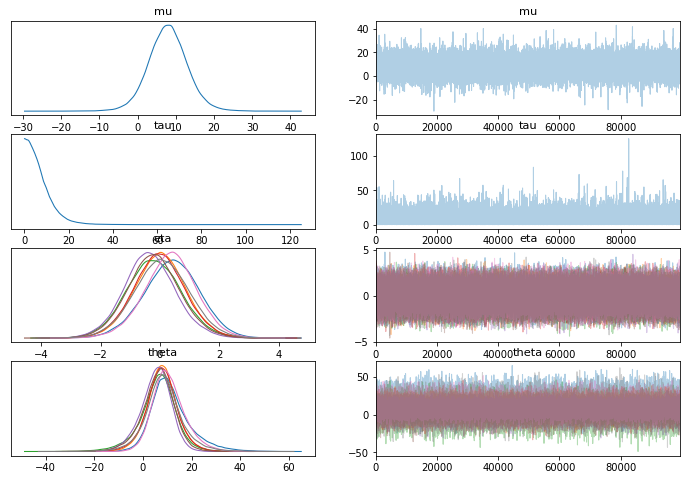

In [7]:
az.plot_trace(idata)